# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
# To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities. 
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

#     Temperature (C) vs. Latitude
#     Humidity (%) vs. Latitude
#     Cloudiness (%) vs. Latitude
#     Wind Speed (kph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing. Your second requirement is to run linear regression on each relationship, 
# only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#     Northern Hemisphere - Temperature (C) vs. Latitude
#     Southern Hemisphere - Temperature (C) vs. Latitude
#     Northern Hemisphere - Humidity (%) vs. Latitude
#     Southern Hemisphere - Humidity (%) vs. Latitude
#     Northern Hemisphere - Cloudiness (%) vs. Latitude
#     Southern Hemisphere - Cloudiness (%) vs. Latitude
#     Northern Hemisphere - Wind Speed (kph) vs. Latitude
#     Southern Hemisphere - Wind Speed (kph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

# Your final notebook must:

#     Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#     Perform a weather check on each of the cities using a series of successive API calls.
#     Include a print log of each city as it's being processed with the city number and city name.
#     Save a CSV of all retrieved data and a PNG image for each scatter plot.


In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import scipy.stats as st

# Import API key
from api_keys import g_key

## Generate Cities List

In [106]:
# randomly generate a list of 600 longitudes & then a list of 600 latitudes, combine them, put them 

In [107]:
#Generating the random list of lat and lon:
# Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. 
# The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.
lat = np.random.uniform(low=-60.000, high=85.000, size=60)
lon = np.random.uniform(low=-180.000, high=180.000, size=60)

In [108]:
# make the lists into a dataframe
lat_and_long_df = pd.DataFrame({"lat": lat, "lon": lon})
lat_and_long_df["cityname"] = " "
lat_and_long_df

,lat,lon,cityname
0,38.605169,-174.470478,
1,83.592083,130.243159,
2,-10.653839,-41.079544,
3,66.581244,63.725924,
4,33.479910,153.101782,
5,-43.537934,153.805518,
6,66.237615,-160.220006,
7,81.003275,105.848912,
8,72.065773,-92.969631,
9,-3.952691,23.341174,


In [152]:
# # params dictionary to update each iteration
# params = {
#     "rankby": "distance",
#     "type": "locality",
#     "key": g_key}

def find_cities(lat, lon):
        params = {"location": f"{lat},{lon}",
                "rankby": "distance",
                "type": "locality",
                "key": g_key}

# Use the lat/lng we generated to identify cities
for index, row in lat_and_long_df.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lon = row["lon"]

    params = {"location": f"{lat},{lon}",
                "rankby": "distance",
                "type": "locality",
                "key": g_key}

    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    city_name = requests.get(base_url, params=params)
    
    # print the name_address url, avoid doing for public github repos in order to avoid exposing key
    #print(city_name.url)

    # # convert to json
    city_name = city_name.json()
    print(json.dumps(city_name, indent=4, sort_keys=True))

    try:
            
        lat_and_long_df.loc[index, 'cityname'] = city_name['results'][0]['name']
            
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


{
    "html_attributions": [],
    "results": [],
    "status": "ZERO_RESULTS"
}
Missing field/result... skipping.
{
    "html_attributions": [],
    "results": [],
    "status": "ZERO_RESULTS"
}
Missing field/result... skipping.
{
    "html_attributions": [],
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": -10.7,
                    "lng": -41.116667
                },
                "viewport": {
                    "northeast": {
                        "lat": -10.68903581821188,
                        "lng": -41.10065957622858
                    },
                    "southwest": {
                        "lat": -10.71096378535903,
                        "lng": -41.13267442377142
                    }
                }
            },
            "icon": "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/geocode-71.png",
            "icon_background_color": "#7B9EB0",
            "icon_mask_base_uri": "http

In [153]:
lat_and_long_df

,lat,lon,cityname
0,38.605169,-174.470478,
1,83.592083,130.243159,
2,-10.653839,-41.079544,Pedra Pintada
3,66.581244,63.725924,
4,33.479910,153.101782,
5,-43.537934,153.805518,
6,66.237615,-160.220006,Selawik
7,81.003275,105.848912,
8,72.065773,-92.969631,Fort Ross
9,-3.952691,23.341174,Dikfudambudi


In [111]:
# Put the lat and long into the google maps api and then search for the nearest city.
# when we find these 'nearest cities', put those names through the api to retrieve their longs & lats.
# add the 'nearest city' long and lats to the dataframe and then delete the original randomly generated longs and lats.
# remove any duplicates (thats why we grab 600, to alow for removing duplicate 'nearest cities' and still have over 500)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
# sos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
# because I wasnt able to com,plete the first section, I've drafted the other parts of the assessment on the example csv provided. 
# I'll change the csv later when i have created my own from the google API task.

draft_cities_df_path = "Resources/global_power_plant_database.csv"
draft_cities_df = pd.read_csv("../output_data/cities.csv")
draft_cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
draft_cities_df = draft_cities_df[draft_cities_df["Humidity"] <=100]
draft_cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [115]:
#  Get the indices of cities that have humidity over 100%.
draft_cities_df[draft_cities_df["Humidity"] > 100].index


Int64Index([], dtype='int64')

In [116]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [117]:
clean_city_data_draft = draft_cities_df.drop(draft_cities_df[draft_cities_df["Humidity"] > 100].index, inplace=False)

clean_city_data_draft

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Max Temp')

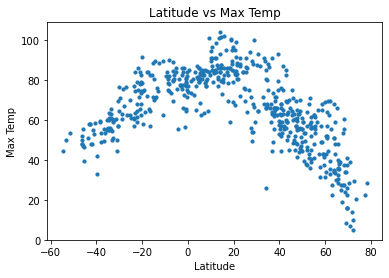

In [118]:
#I WILL NEED TO CHANGE THE UNIT OF MEASURE WHEN I GET MY OWN DATA TO DEGREES CELCIUS

plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Max Temp"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity')

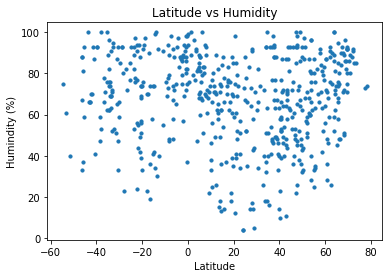

In [119]:
plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Humidity"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Humindity (%)")
plt.title("Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs Cloudiness')

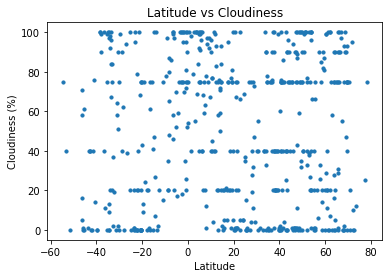

In [120]:
plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Cloudiness"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs Wind Speed')

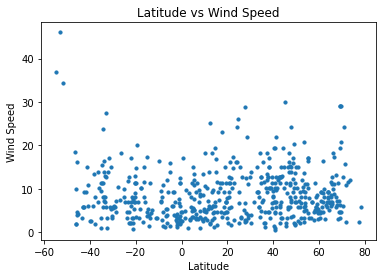

In [121]:
plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Wind Speed"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

## Linear Regression

In [122]:
#clean_city_data_draft

In [123]:
# start by creating new dataframe for northern hemisphere, when the latitude is a positive number
north_hemisphere_df = clean_city_data_draft.loc[clean_city_data_draft["Lat"] >= 0]
north_hemisphere_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [124]:
# start by creating new dataframe for southern hemisphere, when the latitude is a negative number
south_hemisphere_df = clean_city_data_draft.loc[clean_city_data_draft["Lat"] <= 0]
south_hemisphere_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
...,...,...,...,...,...,...,...,...,...,...
526,526,viedma,14,AR,1558378894,41,-40.81,-62.99,58.56,10.98
531,531,russell,75,AR,1558378895,71,-33.01,-68.80,50.00,12.75
536,536,padang,100,ID,1558378896,82,-0.92,100.36,81.24,7.65
539,539,palu,72,ID,1558378897,80,-0.90,119.87,78.72,3.83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [125]:
correlation=round(st.pearsonr(north_hemisphere_df['Lat'],north_hemisphere_df['Max Temp'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Lat'],north_hemisphere_df['Max Temp'])
model

The correlation coefficient is -0.82


LinregressResult(slope=-0.8204052530215327, intercept=95.10898892434297, rvalue=-0.815165740681083, pvalue=1.14327590448888e-91, stderr=0.029983753046137485)

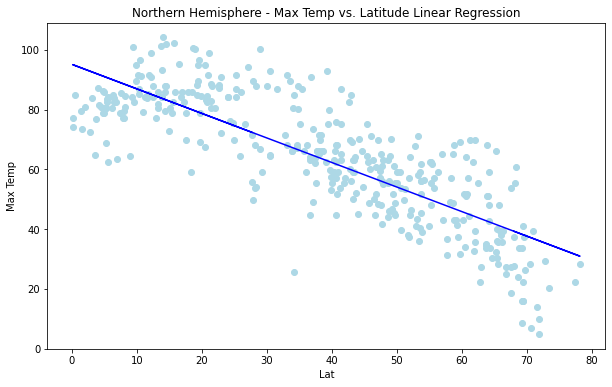

In [126]:
slope = -0.8204052530215327
intercept = 95.10898892434297

y_axis = north_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Lat'],north_hemisphere_df['Max Temp'], color='lightblue')
plt.plot(north_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Max Temp');
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [127]:
correlation=round(st.pearsonr(south_hemisphere_df['Lat'],south_hemisphere_df['Max Temp'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Lat'],south_hemisphere_df['Max Temp'])
model

The correlation coefficient is 0.77


LinregressResult(slope=0.6917751914841688, intercept=83.07462227957339, rvalue=0.7668153152076322, pvalue=1.3632260043965464e-33, stderr=0.04507936835080778)

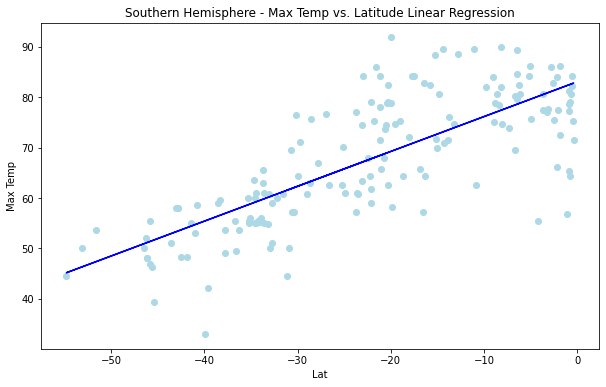

In [128]:
slope = 0.6917751914841688
intercept = 83.07462227957339

y_axis = south_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Lat'],south_hemisphere_df['Max Temp'], color='lightblue')
plt.plot(south_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Max Temp');
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [129]:
correlation=round(st.pearsonr(north_hemisphere_df['Lat'],north_hemisphere_df['Humidity'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Lat'],north_hemisphere_df['Humidity'])
model

The correlation coefficient is 0.1


LinregressResult(slope=0.11223395090861246, intercept=60.84793097541429, rvalue=0.10358336015746496, pvalue=0.04359225630131383, stderr=0.055430128195426254)

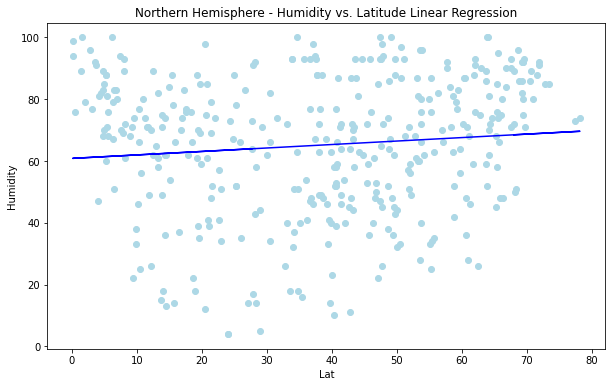

In [130]:
slope = 0.11223395090861246
intercept = 60.84793097541429

y_axis = north_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Lat'],north_hemisphere_df['Humidity'], color='lightblue')
plt.plot(north_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Humidity');
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [131]:
correlation=round(st.pearsonr(south_hemisphere_df['Lat'],south_hemisphere_df['Humidity'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Lat'],south_hemisphere_df['Humidity'])
model

The correlation coefficient is 0.11


LinregressResult(slope=0.15735343929182735, intercept=75.6266881004134, rvalue=0.11398928186062213, pvalue=0.14243392055067866, stderr=0.10676532933705676)

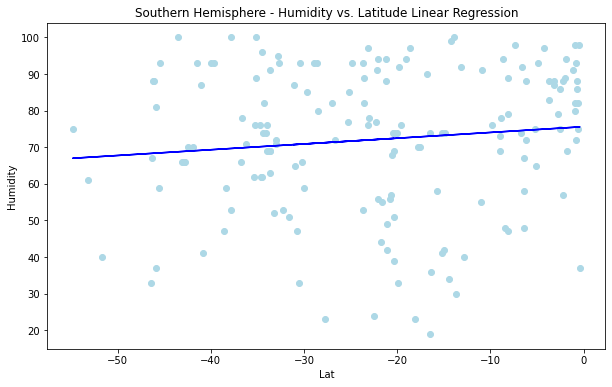

In [132]:
slope = 0.15735343929182735
intercept = 75.6266881004134

y_axis = south_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Lat'],south_hemisphere_df['Humidity'], color='lightblue')
plt.plot(south_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Humidity');
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [133]:
correlation=round(st.pearsonr(north_hemisphere_df['Lat'],north_hemisphere_df['Cloudiness'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Lat'],north_hemisphere_df['Cloudiness'])
model

The correlation coefficient is -0.09


LinregressResult(slope=-0.15496879373885986, intercept=55.93576697284077, rvalue=-0.08733547918934016, pvalue=0.08910778853888573, stderr=0.090916981549384)

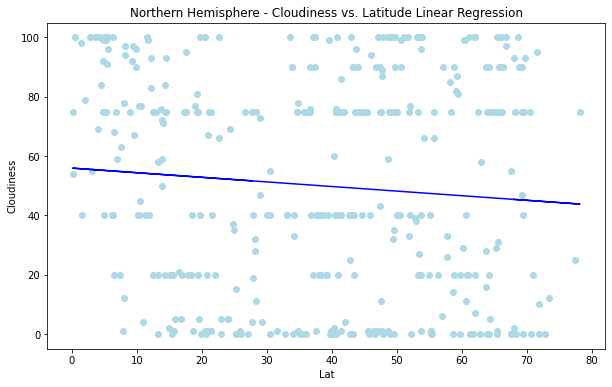

In [134]:
slope = -0.15496879373885986
intercept = 55.93576697284077

y_axis = north_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Lat'],north_hemisphere_df['Cloudiness'], color='lightblue')
plt.plot(north_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Cloudiness');
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [135]:
correlation=round(st.pearsonr(south_hemisphere_df['Lat'],south_hemisphere_df['Cloudiness'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Lat'],south_hemisphere_df['Cloudiness'])
model

The correlation coefficient is 0.23


LinregressResult(slope=0.6133534805975194, intercept=61.96917716470371, rvalue=0.23009846166335715, pvalue=0.0027766619020815216, stderr=0.20194945161942118)

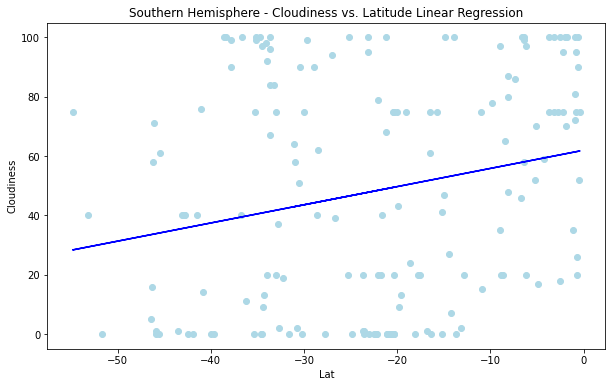

In [136]:
slope = 0.6133534805975194
intercept = 61.96917716470371

y_axis = south_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Lat'],south_hemisphere_df['Cloudiness'], color='lightblue')
plt.plot(south_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Cloudiness');
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [137]:
correlation=round(st.pearsonr(north_hemisphere_df['Lat'],north_hemisphere_df['Wind Speed'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(north_hemisphere_df['Lat'],north_hemisphere_df['Wind Speed'])
model

The correlation coefficient is 0.11


LinregressResult(slope=0.029016896110896955, intercept=7.7893504133859075, rvalue=0.10713827743884795, pvalue=0.036830203110768026, stderr=0.013850116639559972)

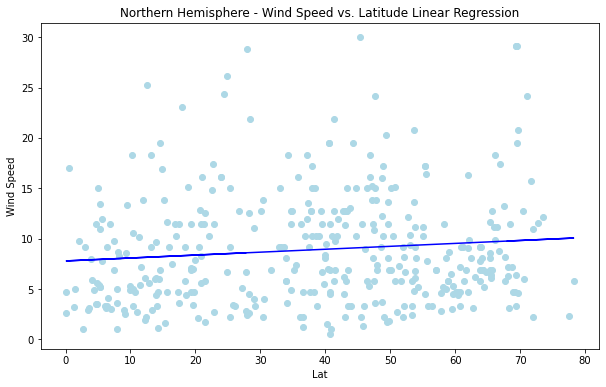

In [138]:
slope = 0.029016896110896955
intercept = 7.7893504133859075

y_axis = north_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(north_hemisphere_df['Lat'],north_hemisphere_df['Wind Speed'], color='lightblue')
plt.plot(north_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Wind Speed');
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [139]:
correlation=round(st.pearsonr(south_hemisphere_df['Lat'],south_hemisphere_df['Wind Speed'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(south_hemisphere_df['Lat'],south_hemisphere_df['Wind Speed'])
model

The correlation coefficient is -0.34


LinregressResult(slope=-0.15278221465917574, intercept=4.706388141411502, rvalue=-0.33605638539234123, pvalue=8.995540351607508e-06, stderr=0.03333470912513558)

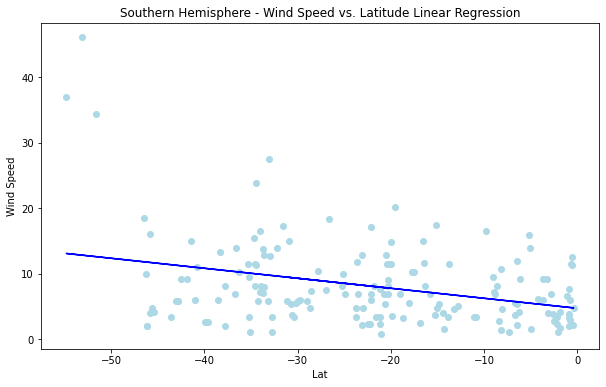

In [140]:
slope = -0.15278221465917574
intercept = 4.706388141411502

y_axis = south_hemisphere_df['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.subplots(figsize=(10,6))
plt.scatter(south_hemisphere_df['Lat'],south_hemisphere_df['Wind Speed'], color='lightblue')
plt.plot(south_hemisphere_df['Lat'],y_axis,color="blue")
plt.xlabel('Lat')
plt.ylabel('Wind Speed');
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()